# `performant_neural_network_stats.ipynb`

### Author: Anthony Hein

#### Last updated: 12/7/2021

# Overview:

Simply makes graphs to provide at-a-glance comparison between a performant neural network and public odds baseline.

The results plotted are derived elsewhere.

---

## Setup

In [1]:
import git
import os
import re
from typing import List
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Create Plot

In [38]:
labels = ['Train', 'Dev']
width = 0.35

pairwise_winner_train = [95.02, 94.68]
pairwise_winner_dev = [67.67, 68.85]

winner_train = [82.72, 83.43]
winner_dev = [36.36, 37.25]

exacta_train = [69.24, 65.61]
exacta_dev = [12.64, 13.44]

trifecta_train = [57.19, 51.38]
trifecta_dev = [4.79, 5.14]

manhattan_train = [3.13, 2.63]
manhattan_dev = [0.53, 0.51]


/var/folders/s0/crtdyrfd7gq75c2mmz_rn9340000gn/T/ipykernel_27721/1026982532.py:73: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax5.transAxes)


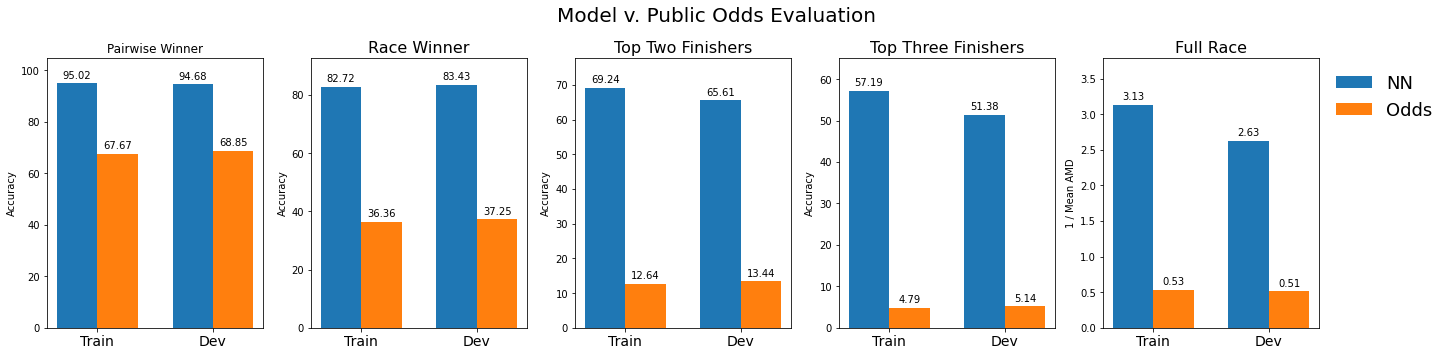

In [81]:
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1, 5)

fig.suptitle("Model v. Public Odds Evaluation", size=20)

ax1 = fig.add_subplot(gs[0:1, 0:1])

ax1.set_title("Pairwise Winner")
rects1 = ax1.bar(np.arange(len(labels)) - width/2, pairwise_winner_train, width, label='NN')
rects2 = ax1.bar(np.arange(len(labels)) + width/2, pairwise_winner_dev, width, label='Odds')
ax1.set_xticks(np.arange(len(labels)))
ax1.set_xticklabels(labels, fontsize=14)
ax1.set_ylim(top=ax1.get_ylim()[1] + 5)
ax1.set_ylabel("Accuracy")
# ax1.legend()

ax1.bar_label(rects1, padding=3)
ax1.bar_label(rects2, padding=3)

ax2 = fig.add_subplot(gs[0:1, 1:2])

ax2.set_title("Race Winner", fontsize=16)
rects1 = ax2.bar(np.arange(len(labels)) - width/2, winner_train, width, label='NN')
rects2 = ax2.bar(np.arange(len(labels)) + width/2, winner_dev, width, label='Odds')
ax2.set_xticks(np.arange(len(labels)))
ax2.set_xticklabels(labels, fontsize=14)
ax2.set_ylim(top=ax2.get_ylim()[1] + 5)
ax2.set_ylabel("Accuracy")
# ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax3 = fig.add_subplot(gs[0:1, 2:3])

ax3.set_title("Top Two Finishers", fontsize=16)
rects1 = ax3.bar(np.arange(len(labels)) - width/2, exacta_train, width, label='NN')
rects2 = ax3.bar(np.arange(len(labels)) + width/2, exacta_dev, width, label='Odds')
ax3.set_xticks(np.arange(len(labels)))
ax3.set_xticklabels(labels, fontsize=14)
ax3.set_ylim(top=ax3.get_ylim()[1] + 5)
ax3.set_ylabel("Accuracy")
# ax3.legend()

ax3.bar_label(rects1, padding=3)
ax3.bar_label(rects2, padding=3)

ax4 = fig.add_subplot(gs[0:1, 3:4])

ax4.set_title("Top Three Finishers", fontsize=16)
rects1 = ax4.bar(np.arange(len(labels)) - width/2, trifecta_train, width, label='NN')
rects2 = ax4.bar(np.arange(len(labels)) + width/2, trifecta_dev, width, label='Odds')
ax4.set_xticks(np.arange(len(labels)))
ax4.set_xticklabels(labels, fontsize=14)
ax4.set_ylim(top=ax4.get_ylim()[1] + 5)
ax4.set_ylabel("Accuracy")
# ax4.legend()

ax4.bar_label(rects1, padding=3)
ax4.bar_label(rects2, padding=3)

ax5 = fig.add_subplot(gs[0:1, 4:5])

ax5.set_title("Full Race", fontsize=16)
rects1 = ax5.bar(np.arange(len(labels)) - width/2, manhattan_train, width, label='NN')
rects2 = ax5.bar(np.arange(len(labels)) + width/2, manhattan_dev, width, label='Odds')
ax5.set_xticks(np.arange(len(labels)))
ax5.set_xticklabels(labels, fontsize=14)
ax5.set_ylim(top=ax5.get_ylim()[1] + 0.5)
ax5.set_ylabel("1 / Mean AMD")
leg = ax5.legend(prop={'size': 18}, frameon=False)

bb = leg.get_bbox_to_anchor().inverse_transformed(ax5.transAxes)

xOffset = 0.6
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax5.transAxes)

ax5.bar_label(rects1, padding=3)
ax5.bar_label(rects2, padding=3)

plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/model_v_public_odds_evaluation.png")

plt.show()

fig.tight_layout()

plt.show()


---